## Analysis

#### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,pathlib,sys,warnings
warnings.filterwarnings('ignore')
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
from tqdm import tqdm
import json
import functions.software_commands as software_commands
import functions.statistics as statistics
import defaults

### Streamed Videos

In [3]:
# Reading json file
def read_json(
    path:str
):
    """
    Reading json file
    Args:
        path (str): Path of json file
    """

    with open(path, "r") as f:
        data = json.load(f)
        
    return data

Data = read_json("//home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/real_time/MyFlights.json")

In [5]:
# Setting to File Map
Setting2File = {}

# Actual Data
for flight_name, data in Data.items():
    # Parameters
    settings = data["Settings"]
    settings = (settings["bitrate"], settings["fps"], settings["speed"], settings["scene_complexity"])
    Setting2File[settings] = flight_name

In [6]:
# Loading Metadata
streamed_videos_segments_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/real_time/streamed_videos_segments/"
streamed_videos_segments_quality_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/real_time/streamed_videos_segments_quality_scores/"

# File2Metadata
File2Metadata = {}
for flight_name in Setting2File.values():
    File2Metadata[flight_name] = {}

# Metadata
for video_file in os.listdir(streamed_videos_segments_dir):
    # File-Details
    file_details = os.path.splitext(video_file)[0].split("_")
    original_filename = file_details[0]
    part = int(file_details[1])

    resolution, fps, b, q = statistics.get_statistics(
        video_path=os.path.join(streamed_videos_segments_dir, video_file),
        quality_dir=streamed_videos_segments_quality_dir
    )
    File2Metadata[original_filename][part] = [fps, b, q]

# Sorting
for key in File2Metadata.keys():
    File2Metadata[key] = dict(sorted(File2Metadata[key].items()))

#### Metrics over Time

Plotting Metrics vs Time

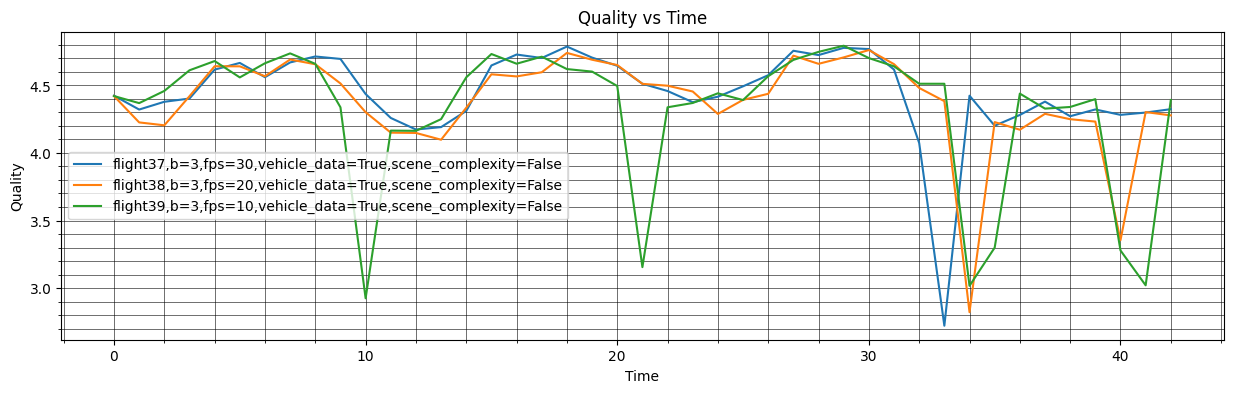

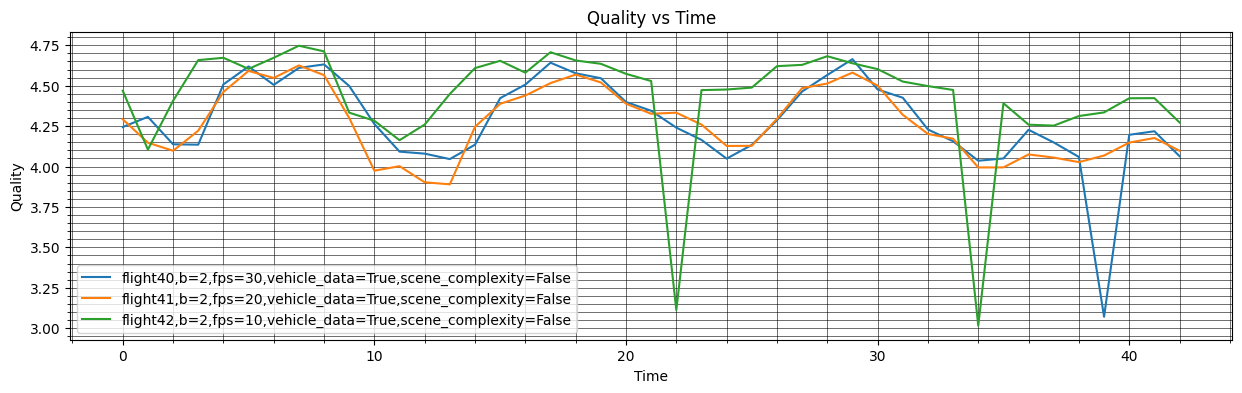

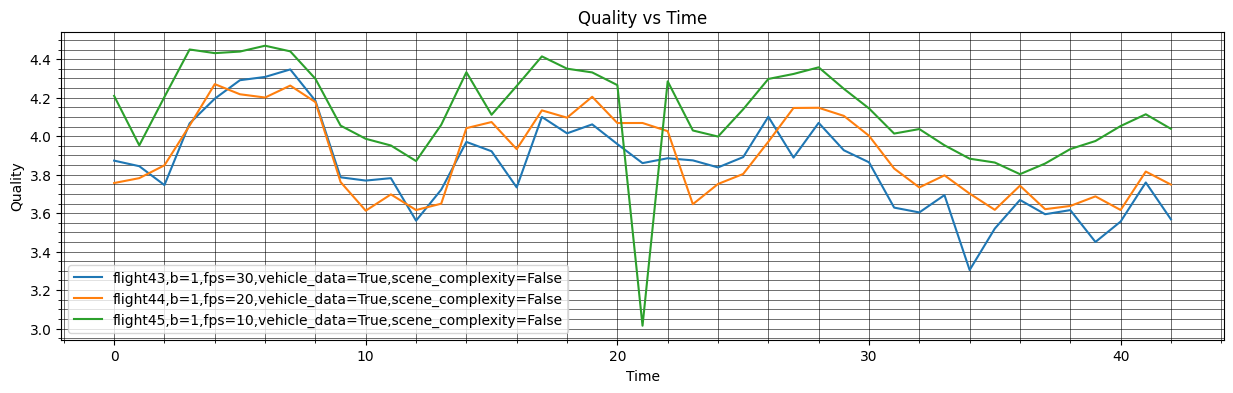

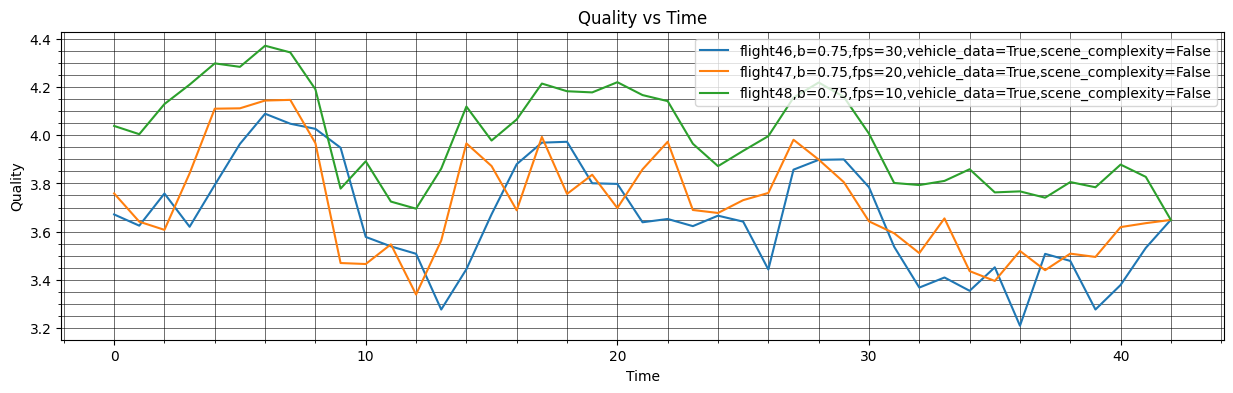

In [7]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Metric
metrics = ["Quality"]

# Settings
for b in [3,2,1,0.75]:
    settings = [(b, 30, True, False), (b, 20, True, False), (b, 10, True, False)]

    # Plotting Seperately
    plt.figure(figsize=(15,4*len(metrics)))
    plt.minorticks_on()
    for i,metric in enumerate(metrics):
        # Plot
        plt.subplot(len(metrics), 1, i+1)
        plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
        plt.grid(which='minor', linestyle='-', linewidth='0.4', color='black')
        plt.title("{} vs Time".format(metric))
        plt.xlabel("Time")
        plt.ylabel(metric)
        
        for setting in settings:
            flight_name = Setting2File[setting]
            data = File2Metadata[flight_name]

            time = np.asarray(list(data.keys()))
            metadata = np.asarray(list(data.values()))

            if metric == "Quality":
                metric_values = metadata[:, 2]
            elif metric == "Bitrate":
                metric_values = metadata[:, 1]
            else:
                metric_values = metadata[:, 0]

            plt.plot(time, metric_values, label="{},b={},fps={},vehicle_data={},scene_complexity={}".format(flight_name,setting[0],setting[1],setting[2],setting[3]))

        plt.legend()

    plt.show()

#### Distrubution of Quality Scores

flight37 4.444066958806378 0.32925788759645075
flight38 4.388996849665561 0.3486936341975427
flight39 4.3200154897562495 0.5117503849602691


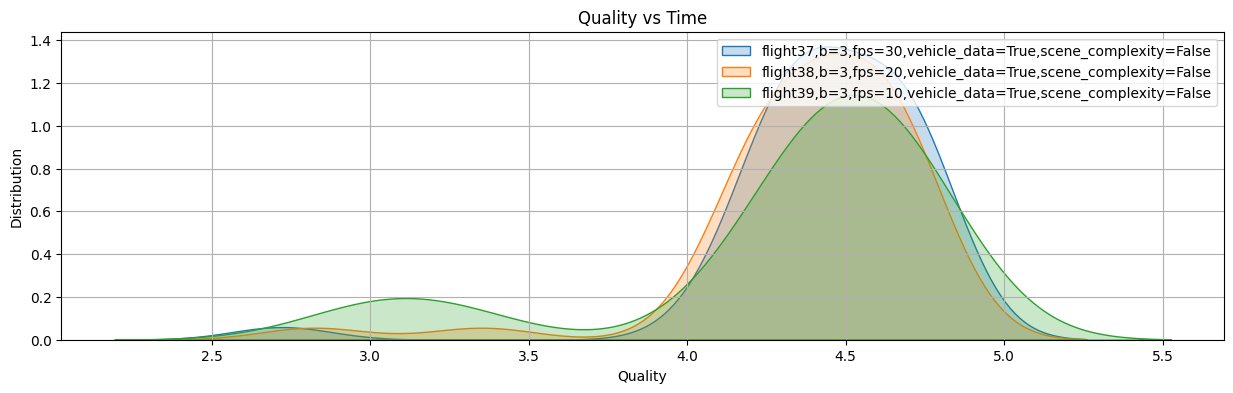

flight40 4.283269224055695 0.2730611376197191
flight41 4.269003534370138 0.21008011154531311
flight42 4.427579906668573 0.34141515039745063


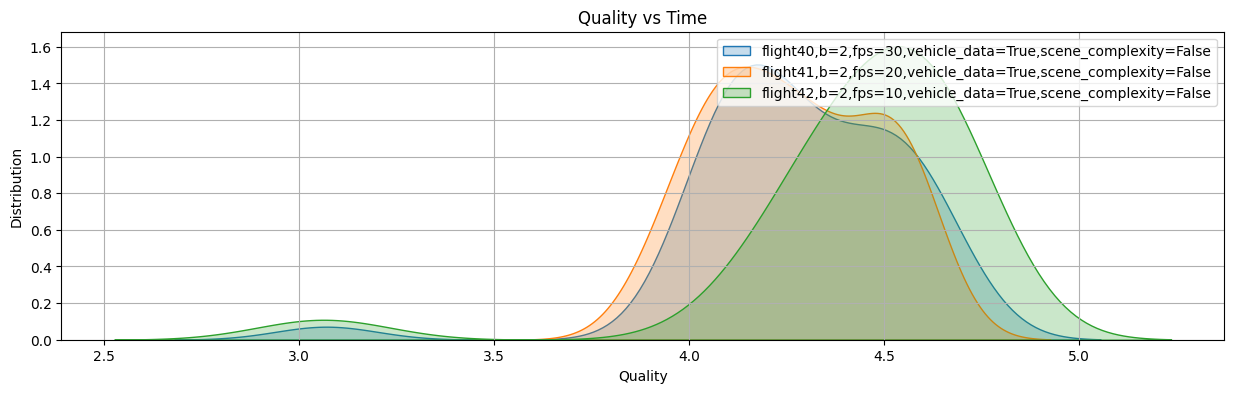

flight43 3.8463200944155096 0.23541491282882115
flight44 3.899390643862274 0.21347162021243274
flight45 4.121831993321089 0.2559997350575696


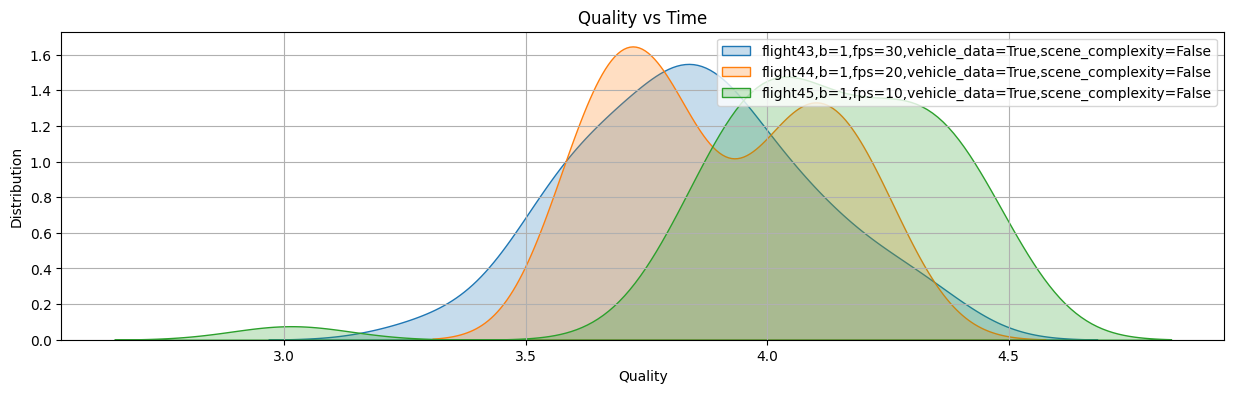

flight46 3.656610194412149 0.22714498284561102
flight47 3.72083084804504 0.2134103614430812
flight48 3.997437795423025 0.19831968374777822


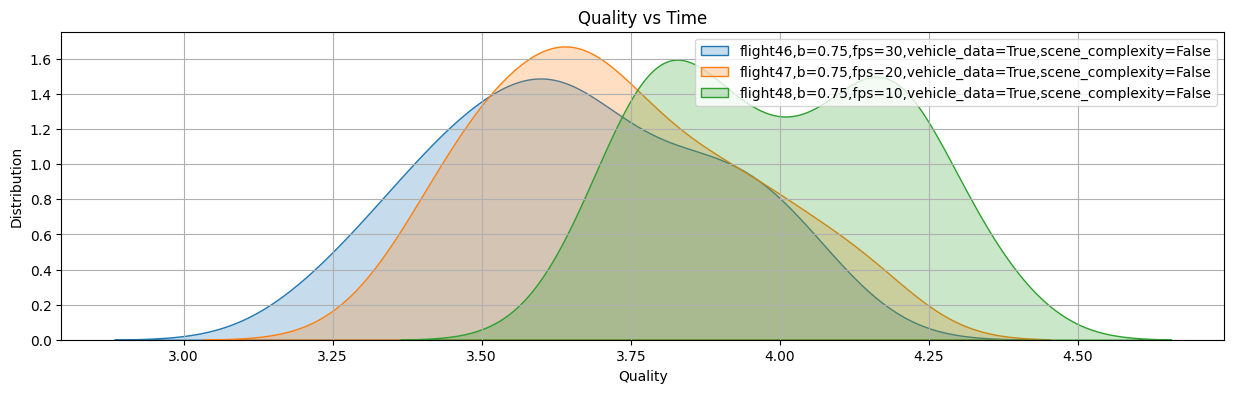

In [8]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Metric
metric = "Quality"

# Settings
for b in [3,2,1,0.75]:
    settings = [(b, 30, True, False), (b, 20, True, False), (b, 10, True, False)]

    # Plotting Seperately
    plt.figure(figsize=(15,4*len(metrics)))
    plt.title("{} vs Time".format(metric))
    plt.xlabel("Quality")
    plt.ylabel("Distribution")
    plt.grid()
        
    for setting in settings:
        flight_name = Setting2File[setting]
        data = File2Metadata[flight_name]

        time = np.asarray(list(data.keys()))
        metadata = np.asarray(list(data.values()))

        if metric == "Quality":
            metric_values = metadata[:, 2]
        elif metric == "Bitrate":
            metric_values = metadata[:, 1]
        else:
            metric_values = metadata[:, 0]

        sns.kdeplot(data=metric_values, label="{},b={},fps={},vehicle_data={},scene_complexity={}".format(flight_name,setting[0],setting[1],setting[2],setting[3]), fill=True)
        print (flight_name, np.mean(metric_values), np.std(metric_values))

    plt.legend()
    plt.show()